# Computational Drug Discovery - Part 2 - Exploratory Data Analysis

Components: Descriptor Calculation and Exploratory Data Analysis.

## Install necessary libraries

In [1]:
conda install -c rdkit rdkit -y

Solving environment: done

# All requested packages already installed.


Note: you may need to restart the kernel to use updated packages.


In [2]:
import sys
sys.path.append('/usr/local/lib/python3.7/site-packages/')

## Load the bioactivity data from Part 1

In [2]:
import pandas as pd

In [4]:
ls

 bioactivity_data.csv
 boxplot_LogP.pdf
 boxplot_MW.pdf
 boxplot_Num_H_Acceptors.pdf
 boxplot_Num_H_Donors.pdf
 boxplt_pIC50.pdf
 CDD_Malaria_Bioactivity_Data.ipynb
 CDD_Malaria_Exploratory_Data_Analysis.ipynb
'Frequency plot.bioactivity class.pdf'
 mannwhitneyuLogP.csv
 mannwhitneyuMW.csv
 mannwhitneyuNumHAcceptors.csv
 mannwhitneyuNumHDonors.csv
 mannwhitneyupIC50.csv
 pfHT1_Preprocessed_biological_data.csv
 plot_MW_vs_LogP.pdf


In [3]:
df = pd.read_csv('pfHT1_Preprocessed_biological_data.csv')

## Calculate Lipinski descriptors

The Lipinski Rule of 5 is used for describing the ADME profile or the drug-likeness of orally active FDA-approved drugs


The Lipinski's Rule stated the following:

* Molecular weight < 500 Dalton 
* Octanol-water partition coefficient (LogP) < 5 
* Hydrogen bond donors < 5 
* Hydrogen bond acceptors < 10

LogP value is more like the solubility of the molecule

### Import libraries

In [4]:
import numpy as np
from rdkit import Chem
from rdkit.Chem import Descriptors, Lipinski

### Calculate Descriptors

In [5]:
def lipinski(smiles, verbose=False):
    moldata=[]
    for elem in smiles:
        mol = Chem.MolFromSmiles(elem)
        moldata.append(mol)
    
    basedata = np.arange(1,1)
    i=0
    for mol in moldata:
        desc_MolWt = Descriptors.MolWt(mol)
        desc_MolLogP = Descriptors.MolLogP(mol)
        desc_NumHDonors = Lipinski.NumHDonors(mol)
        desc_NUmHAcceptors = Lipinski.NumHAcceptors(mol)
        
        row = np.array([desc_MolWt,
                       desc_MolLogP,
                       desc_NumHDonors,
                       desc_NUmHAcceptors])
        if(i == 0):
            basedata = row
        else:
            basedata = np.vstack([basedata,row])
        i = i+1
        
    columnNames = ['MW','LogP','NumHDonors','NumHAcceptors']
    descriptors = pd.DataFrame(data=basedata,columns=columnNames)
    
    return descriptors                

In [6]:
df_lipinski = lipinski(df.canonical_smiles)

### Combine dataframes for a more cohesive data structure

In [7]:
df_lipinski

,MW,LogP,NumHDonors,NumHAcceptors
0,396.478,5.11400,1.0,3.0
1,329.835,3.61230,2.0,4.0
2,492.910,5.80790,1.0,6.0
3,476.911,6.10772,1.0,5.0
4,472.448,5.30402,1.0,7.0
...,...,...,...,...
787,487.694,6.59034,1.0,5.0
788,485.653,6.64934,1.0,5.0
789,489.524,5.36062,0.0,8.0
790,420.490,4.82620,1.0,6.0


In [8]:
df

,molecule_chembl_id,canonical_smiles,standard_value,bioactivity_class
0,CHEMBL2028051,O=C(NCC(c1ccsc1)N1CCCCCC1)c1ccc(C(F)(F)F)cc1,12000.0,inactive
1,CHEMBL1459149,CCN1CCCC1CNc1[nH]cnc2c3cc(Cl)ccc3nc1-2,12000.0,inactive
2,CHEMBL2028052,COc1ccc(-c2cc3c(SCC(=O)Nc4cc(C(F)(F)F)ccc4Cl)n...,12000.0,inactive
3,CHEMBL2028053,Cc1ccc(-c2cc3c(SCC(=O)Nc4cc(C(F)(F)F)ccc4Cl)nc...,11335.0,inactive
4,CHEMBL2028054,Cc1cc(NC(=O)c2cccc(C(F)(F)F)c2)n(-c2nc(-c3ccc4...,12000.0,inactive
...,...,...,...,...
787,CHEMBL2028046,Cc1sc(NC(=O)c2ccccc2)c(C(c2cccs2)N2CCN(c3ccccc...,12000.0,inactive
788,CHEMBL2028047,Cc1sc(NC(=O)c2ccco2)c(C(c2cccnc2)N2CCC(Cc3cccc...,12000.0,inactive
789,CHEMBL2028048,CCOC(=O)c1c(C)n(-c2ccccc2)c2ccc(OC(=O)c3cc(OC)...,12000.0,inactive
790,CHEMBL2028049,COc1cc(C(=O)Nc2nc3c(cc4c5c(cccc53)CC4)s2)cc(OC...,12000.0,inactive


In [9]:
df_combined = pd.concat([df, df_lipinski], axis=1)
df_combined

,molecule_chembl_id,canonical_smiles,standard_value,bioactivity_class,MW,LogP,NumHDonors,NumHAcceptors
0,CHEMBL2028051,O=C(NCC(c1ccsc1)N1CCCCCC1)c1ccc(C(F)(F)F)cc1,12000.0,inactive,396.478,5.11400,1.0,3.0
1,CHEMBL1459149,CCN1CCCC1CNc1[nH]cnc2c3cc(Cl)ccc3nc1-2,12000.0,inactive,329.835,3.61230,2.0,4.0
2,CHEMBL2028052,COc1ccc(-c2cc3c(SCC(=O)Nc4cc(C(F)(F)F)ccc4Cl)n...,12000.0,inactive,492.910,5.80790,1.0,6.0
3,CHEMBL2028053,Cc1ccc(-c2cc3c(SCC(=O)Nc4cc(C(F)(F)F)ccc4Cl)nc...,11335.0,inactive,476.911,6.10772,1.0,5.0
4,CHEMBL2028054,Cc1cc(NC(=O)c2cccc(C(F)(F)F)c2)n(-c2nc(-c3ccc4...,12000.0,inactive,472.448,5.30402,1.0,7.0
...,...,...,...,...,...,...,...,...
787,CHEMBL2028046,Cc1sc(NC(=O)c2ccccc2)c(C(c2cccs2)N2CCN(c3ccccc...,12000.0,inactive,487.694,6.59034,1.0,5.0
788,CHEMBL2028047,Cc1sc(NC(=O)c2ccco2)c(C(c2cccnc2)N2CCC(Cc3cccc...,12000.0,inactive,485.653,6.64934,1.0,5.0
789,CHEMBL2028048,CCOC(=O)c1c(C)n(-c2ccccc2)c2ccc(OC(=O)c3cc(OC)...,12000.0,inactive,489.524,5.36062,0.0,8.0
790,CHEMBL2028049,COc1cc(C(=O)Nc2nc3c(cc4c5c(cccc53)CC4)s2)cc(OC...,12000.0,inactive,420.490,4.82620,1.0,6.0


In [10]:
df_combined.describe()

,standard_value,MW,LogP,NumHDonors,NumHAcceptors
count,792.000000,792.000000,792.000000,792.000000,792.000000
mean,8536.429293,422.329591,4.700649,1.603535,4.790404
std,4772.188819,111.980323,1.579779,1.030208,1.743765
min,35.000000,167.124000,-2.563000,0.000000,1.000000
25%,4395.250000,337.317000,3.696000,1.000000,4.000000
50%,12000.000000,407.562000,4.538570,1.000000,5.000000
75%,12000.000000,492.955250,5.502130,2.000000,6.000000
max,23000.000000,726.966000,10.445400,6.000000,11.000000


### Convert standard IC50 values to pIC50 values

To allow IC50 data to be more uniformly distributed, we will convert IC50 to the negative logarithmic scale which is essentially -log10(IC50).

We can create a custom function pIC50() will accept a DataFrame as input and will:

1. Take the IC50 values from the standard_value column and converts it from nM to M by multiplying the value by 10$^{-9}$
2. Take the molar value and apply -log10
3. Delete the standard_value column and create a new pIC50 column

In [11]:
# https://github.com/chaninlab/estrogen-receptor-alpha-qsar/blob/master/02_ER_alpha_RO5.ipynb
import numpy as np

def pIC50(input):
    pIC50 = []
    
    for i in input['standard_value_norm']:
        molar = i * (10**-9)
        pIC50.append(-np.log10(molar))
        
    input['pIC50'] = pIC50
    X = input.drop('standard_value_norm',1)
    
    return X

To avoid negative logarithmic values, Values greater than 100,000,000 will be fixed at 100,000,000

In [12]:
def norm_value(input):
    norm = []
    
    for i in input['standard_value']:
        if i > 100000000:
            i = 100000000
        norm.append(i)
    input['standard_value_norm'] = norm
    X = input.drop('standard_value', 1)
    
    return X

First,apply the norm_value function to normalize the values within the standard_value column

In [13]:
df_norm = norm_value(df_combined)
df_norm

,molecule_chembl_id,canonical_smiles,bioactivity_class,MW,LogP,NumHDonors,NumHAcceptors,standard_value_norm
0,CHEMBL2028051,O=C(NCC(c1ccsc1)N1CCCCCC1)c1ccc(C(F)(F)F)cc1,inactive,396.478,5.11400,1.0,3.0,12000.0
1,CHEMBL1459149,CCN1CCCC1CNc1[nH]cnc2c3cc(Cl)ccc3nc1-2,inactive,329.835,3.61230,2.0,4.0,12000.0
2,CHEMBL2028052,COc1ccc(-c2cc3c(SCC(=O)Nc4cc(C(F)(F)F)ccc4Cl)n...,inactive,492.910,5.80790,1.0,6.0,12000.0
3,CHEMBL2028053,Cc1ccc(-c2cc3c(SCC(=O)Nc4cc(C(F)(F)F)ccc4Cl)nc...,inactive,476.911,6.10772,1.0,5.0,11335.0
4,CHEMBL2028054,Cc1cc(NC(=O)c2cccc(C(F)(F)F)c2)n(-c2nc(-c3ccc4...,inactive,472.448,5.30402,1.0,7.0,12000.0
...,...,...,...,...,...,...,...,...
787,CHEMBL2028046,Cc1sc(NC(=O)c2ccccc2)c(C(c2cccs2)N2CCN(c3ccccc...,inactive,487.694,6.59034,1.0,5.0,12000.0
788,CHEMBL2028047,Cc1sc(NC(=O)c2ccco2)c(C(c2cccnc2)N2CCC(Cc3cccc...,inactive,485.653,6.64934,1.0,5.0,12000.0
789,CHEMBL2028048,CCOC(=O)c1c(C)n(-c2ccccc2)c2ccc(OC(=O)c3cc(OC)...,inactive,489.524,5.36062,0.0,8.0,12000.0
790,CHEMBL2028049,COc1cc(C(=O)Nc2nc3c(cc4c5c(cccc53)CC4)s2)cc(OC...,inactive,420.490,4.82620,1.0,6.0,12000.0


### Process the df_norm dataframe to drop the standard_value column and insert pIC50 column

In [14]:
df_PIC50 = pIC50(df_norm)
df_PIC50

,molecule_chembl_id,canonical_smiles,bioactivity_class,MW,LogP,NumHDonors,NumHAcceptors,pIC50
0,CHEMBL2028051,O=C(NCC(c1ccsc1)N1CCCCCC1)c1ccc(C(F)(F)F)cc1,inactive,396.478,5.11400,1.0,3.0,4.920819
1,CHEMBL1459149,CCN1CCCC1CNc1[nH]cnc2c3cc(Cl)ccc3nc1-2,inactive,329.835,3.61230,2.0,4.0,4.920819
2,CHEMBL2028052,COc1ccc(-c2cc3c(SCC(=O)Nc4cc(C(F)(F)F)ccc4Cl)n...,inactive,492.910,5.80790,1.0,6.0,4.920819
3,CHEMBL2028053,Cc1ccc(-c2cc3c(SCC(=O)Nc4cc(C(F)(F)F)ccc4Cl)nc...,inactive,476.911,6.10772,1.0,5.0,4.945578
4,CHEMBL2028054,Cc1cc(NC(=O)c2cccc(C(F)(F)F)c2)n(-c2nc(-c3ccc4...,inactive,472.448,5.30402,1.0,7.0,4.920819
...,...,...,...,...,...,...,...,...
787,CHEMBL2028046,Cc1sc(NC(=O)c2ccccc2)c(C(c2cccs2)N2CCN(c3ccccc...,inactive,487.694,6.59034,1.0,5.0,4.920819
788,CHEMBL2028047,Cc1sc(NC(=O)c2ccco2)c(C(c2cccnc2)N2CCC(Cc3cccc...,inactive,485.653,6.64934,1.0,5.0,4.920819
789,CHEMBL2028048,CCOC(=O)c1c(C)n(-c2ccccc2)c2ccc(OC(=O)c3cc(OC)...,inactive,489.524,5.36062,0.0,8.0,4.920819
790,CHEMBL2028049,COc1cc(C(=O)Nc2nc3c(cc4c5c(cccc53)CC4)s2)cc(OC...,inactive,420.490,4.82620,1.0,6.0,4.920819


### Save the dataframe as a csv file

In [15]:
df_PIC50.to_csv('pfHT1_biological_data_pIC50.csv', index=False)

In [16]:
df_PIC50.describe()

,MW,LogP,NumHDonors,NumHAcceptors,pIC50
count,792.000000,792.000000,792.000000,792.000000,792.000000
mean,422.329591,4.700649,1.603535,4.790404,5.194072
std,111.980323,1.579779,1.030208,1.743765,0.417818
min,167.124000,-2.563000,0.000000,1.000000,4.638272
25%,337.317000,3.696000,1.000000,4.000000,4.920819
50%,407.562000,4.538570,1.000000,5.000000,4.920819
75%,492.955250,5.502130,2.000000,6.000000,5.357017
max,726.966000,10.445400,6.000000,11.000000,7.455932


### Futher processing of the Data
### We remove the intermediate bioactivity class

For the graphical analysis, the *intermediate* bioactivity class is not quite useful for us. We are more interested in comparing the *actives* and the *inactives*

In [17]:
df_final = df_PIC50[df_PIC50.bioactivity_class != 'intermediate']
df_final

,molecule_chembl_id,canonical_smiles,bioactivity_class,MW,LogP,NumHDonors,NumHAcceptors,pIC50
0,CHEMBL2028051,O=C(NCC(c1ccsc1)N1CCCCCC1)c1ccc(C(F)(F)F)cc1,inactive,396.478,5.11400,1.0,3.0,4.920819
1,CHEMBL1459149,CCN1CCCC1CNc1[nH]cnc2c3cc(Cl)ccc3nc1-2,inactive,329.835,3.61230,2.0,4.0,4.920819
2,CHEMBL2028052,COc1ccc(-c2cc3c(SCC(=O)Nc4cc(C(F)(F)F)ccc4Cl)n...,inactive,492.910,5.80790,1.0,6.0,4.920819
3,CHEMBL2028053,Cc1ccc(-c2cc3c(SCC(=O)Nc4cc(C(F)(F)F)ccc4Cl)nc...,inactive,476.911,6.10772,1.0,5.0,4.945578
4,CHEMBL2028054,Cc1cc(NC(=O)c2cccc(C(F)(F)F)c2)n(-c2nc(-c3ccc4...,inactive,472.448,5.30402,1.0,7.0,4.920819
...,...,...,...,...,...,...,...,...
786,CHEMBL2028045,O=C(NC1CCN(Cc2ccccc2)CC1)c1cc2nc(-c3ccc(Cl)s3)...,inactive,519.980,5.52440,1.0,6.0,4.920819
787,CHEMBL2028046,Cc1sc(NC(=O)c2ccccc2)c(C(c2cccs2)N2CCN(c3ccccc...,inactive,487.694,6.59034,1.0,5.0,4.920819
788,CHEMBL2028047,Cc1sc(NC(=O)c2ccco2)c(C(c2cccnc2)N2CCC(Cc3cccc...,inactive,485.653,6.64934,1.0,5.0,4.920819
789,CHEMBL2028048,CCOC(=O)c1c(C)n(-c2ccccc2)c2ccc(OC(=O)c3cc(OC)...,inactive,489.524,5.36062,0.0,8.0,4.920819


In [49]:
#df_inactives = df_PIC50[df_PIC50.bioactivity_class == 'inactive']
#df_inactives.describe()

In [50]:
#df_actives = df_PIC50[df_PIC50.bioactivity_class == 'active']
#df_actives.describe()

## Exploratory Data Analysis(Chemical Space Analysis) using the Lipinski descriptors

### Install libraries

In [18]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.


### Import libraries

In [19]:
import seaborn as sns
sns.set(style='ticks')
import matplotlib.pyplot as plt

### Frequency plot for the bioactivity classes

In [20]:
plt.figure(figsize=(5.5,5.5))
sns.countplot(x='bioactivity_class',data=df_final, edgecolor='black')

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('Frequency', fontsize=14, fontweight='bold')

plt.savefig('Frequency plot.bioactivity class.pdf')

### Scatter plot of MW vs LogP

In [21]:
plt.figure(figsize=(5.5,5.5))
sns.scatterplot(x='MW', y='LogP',data=df_final,hue='bioactivity_class',size='pIC50',edgecolor='black',alpha=0.7)

plt.xlabel('MolWt',fontsize=14, fontweight='bold')
plt.ylabel('LogP', fontsize=14, fontweight='bold')
plt.legend(bbox_to_anchor=(1.05,1),loc=2, borderaxespad=0)

plt.savefig('plot_MW_vs_LogP.pdf')

### Statisitical Analyses - Mann Whitney U test

In [22]:
def mannwhitney(descriptor, verbose=False):
    # https://machinelearningmastery.com/nonparametric-statistical-significance-tests-in-python/
    from numpy.random import seed
    from numpy.random import randn
    from scipy.stats import mannwhitneyu
    
    #seed the random number generator
    seed(1)
    
    #actives and inactives
    selection = [descriptor, 'bioactivity_class']
    df = df_final[selection]
    active = df[df.bioactivity_class=='active']
    active=active[descriptor]
    
    selection = [descriptor, 'bioactivity_class']
    df = df_final[selection]
    inactive = df[df.bioactivity_class=='inactive']
    inactive=inactive[descriptor]
    
    #compare samples
    stat, p = mannwhitneyu(active, inactive)
    
    #interpret
    alpha=0.05
    if p > alpha:
        interpretation = 'Same distribution(Fail to reject Ho)'
    else:
        interpretation = 'Different distribution(Reject Ho)'
        
    results=pd.DataFrame({'Descriptor': descriptor,
                         'Statistics': stat,
                         'p': p,
                         'Alpha': alpha,
                         'Interpretation': interpretation}, index=[0])
    filename = 'mannwhitneyu' + descriptor + '.csv'
    results.to_csv(filename)
    
    return results

### Box plot for pIC50 values

In [23]:
plt.figure(figsize=(5.5,5.5))
sns.boxplot(x='bioactivity_class',y='pIC50',data=df_final)

plt.xlabel('Bioactivity class',fontsize=14, fontweight='bold')
plt.ylabel('pIC50',fontsize=14, fontweight='bold')

plt.savefig('boxplt_pIC50.pdf')

In [24]:
mannwhitney('pIC50')

,Descriptor,Statistics,p,Alpha,Interpretation
0,pIC50,0.0,9.150650e-52,0.05,Different distribution(Reject Ho)


### Box plot for MW

In [25]:
plt.figure(figsize=(5.5,5.5))
sns.boxplot(x='bioactivity_class',y='MW', data=df_final)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('MW', fontsize=14, fontweight='bold')

plt.savefig('boxplot_MW.pdf')

In [26]:
mannwhitney('MW')

,Descriptor,Statistics,p,Alpha,Interpretation
0,MW,8777.0,0.262375,0.05,Same distribution(Fail to reject Ho)


### Box plot for LogP

In [27]:
plt.figure(figsize=(5.5,5.5))
sns.boxplot(x='bioactivity_class',y='LogP', data=df_final)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('LogP', fontsize=14, fontweight='bold')

plt.savefig('boxplot_LogP.pdf')

In [28]:
mannwhitney('LogP')

,Descriptor,Statistics,p,Alpha,Interpretation
0,LogP,6582.0,0.000612,0.05,Different distribution(Reject Ho)


### Box plot for num of HDonors

In [29]:
plt.figure(figsize=(5.5,5.5))
sns.boxplot(x='bioactivity_class',y='NumHDonors', data=df_final)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('NumHDonors', fontsize=14, fontweight='bold')

plt.savefig('boxplot_Num_H_Donors.pdf')

In [30]:
mannwhitney('NumHDonors')

,Descriptor,Statistics,p,Alpha,Interpretation
0,NumHDonors,6894.0,0.001161,0.05,Different distribution(Reject Ho)


### Box plot for num of HAcceptors

In [31]:
plt.figure(figsize=(5.5,5.5))
sns.boxplot(x='bioactivity_class',y='NumHAcceptors', data=df_final)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('NumHAcceptors', fontsize=14, fontweight='bold')

plt.savefig('boxplot_Num_H_Acceptors.pdf')

In [32]:
mannwhitney('NumHAcceptors')

,Descriptor,Statistics,p,Alpha,Interpretation
0,NumHAcceptors,5659.0,0.000005,0.05,Different distribution(Reject Ho)


## Interpretation of the Statistical results

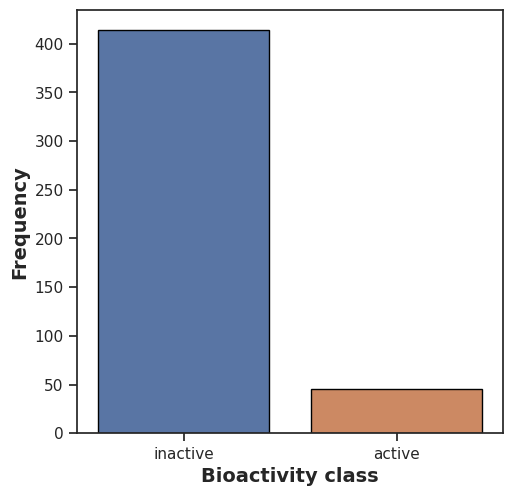

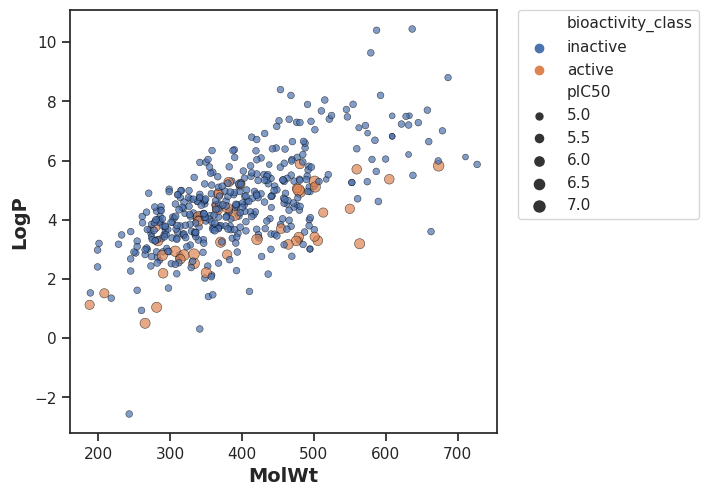

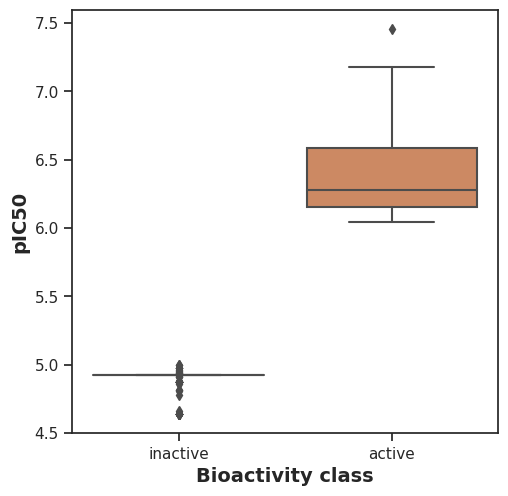

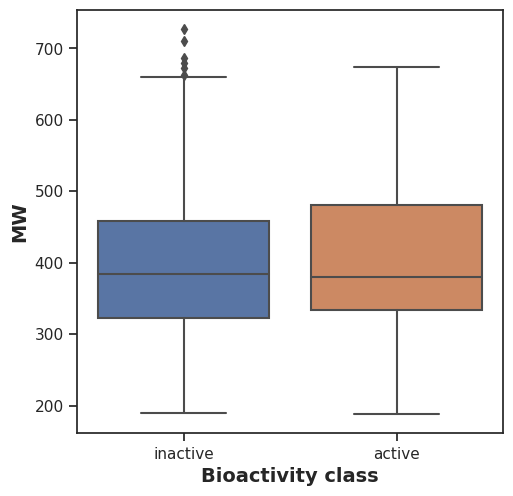

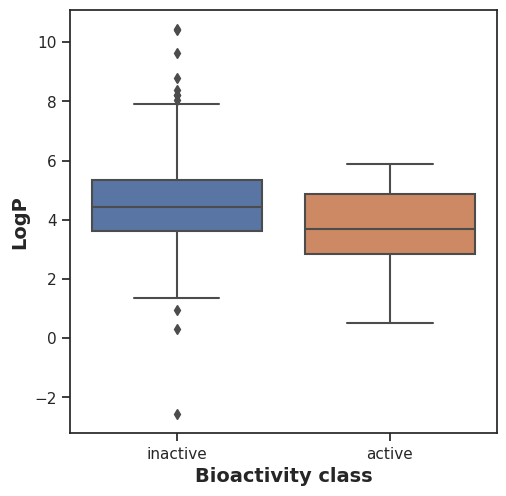

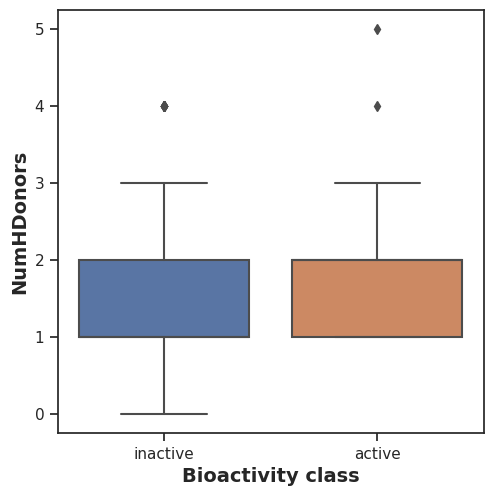

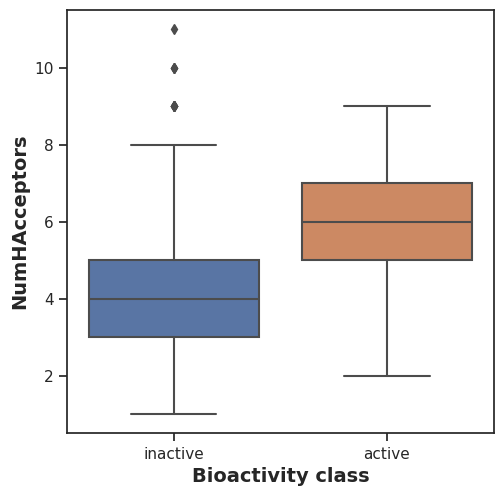

In [36]:
plt.show()

### pIC50

Observations:

Taking a look at the pIC50 values, the actives and inactives displayed a **statistically significant difference** at 0.05 significance which is well expected since the threshold values capped for the IC50 values(*IC50<1000 = actives and IC50>10000 = inactives*) correspond to those for the pIC50 scale(*pIC50<5 = inactives and pIC50>6 = actives*)

The pIC50 values for the inactive molecules all lied on the same value(4.xx) hence the lack of a blue box region but rather the horizontal line

### Mannwhitney u test

Of the 4 lipinski descriptors, only the Mol. Weight (MW) shows **no significant difference** between the actives and inactives at 0.05 significance.Based on the mannwhitney U test,the other 3 descriptors(LogP,NumHDonors,NumHAcceptors) show statistically significant difference


`Note`: The plot distribution of the NumHDonors shows quite similar distribution between the 2 bioactivity classes and after observing the description of the NumHDonor column for both active and inactives supports this observation. We can make an assumption for hypothesis testing here